In [ ]:
# Ariana Pineda, CAAM 210, Spring 2022, Neural Networks
# Neural Networks.ipynb
# This script uses neural networks for letter recognition
# Last Modified: April 18, 2022

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def Sigmoid(x):
    #this function returns output of the sigmoid function
    #inputs: x—number used to solve sigmoid function
    #outputs: s—the result of the sigmoid function
    
    s=1/(1+np.exp(0.5-x))
    return s

In [4]:
def neural(V,W,maxiter,rate,train,target):
    #this function returns two weight matrices after successful training at given rate
    #inputs: V,W—weight matrices, maxiter—iterations, rate—gradient descent step, train—train data, test—test data
    #outputs: V,W—weight matrices
    
    for iter in range(maxiter):
        #pick pattern from training data
        N=train.shape
        j = np.random.randint(N[0])
        #select a certain letter to train on
        p=train[j-1,:].T
        q=Sigmoid(V@p)
        o = Sigmoid(W@q)
        tmp = (o-target[j-1,:].T)@o.T@(1-o)
        grad_W = tmp@q.T
        grad_V=(W.T*q*(1-q))@tmp@p.T
        V=V-rate*grad_V
        W=W-rate*grad_W
    return V,W
        
        

In [7]:
def Modify(L):
    #this function modifies a letter by one bit
    #inputs: L—a letter matrix
    #outputs: L—the modified letter
    
    #generate random int from 0 to 25
    n = np.random.randint(25)
    #run an if-statemnt to modify L at [0,n]
    if L[0,n]==1:
        L[0,n]=0
    if L[0,n]==0:
        L[0,n]==1
    return L

100.0


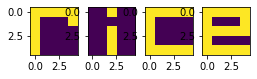

In [8]:
def driver():
    #Define R,I,C,E
    r=np.array([1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0])
    i=np.array([0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0])
    c=np.array([1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1])
    e=np.array([1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1])
    #plot rice
    plt.figure(1)
    plt.subplot(1,6,1)
    plt.imshow(np.reshape(r,(5,5)))
    plt.subplot(1,6,2)
    plt.imshow(np.reshape(i,(5,5)))
    plt.subplot(1,6,3)
    plt.imshow(np.reshape(c,(5,5)))
    plt.subplot(1,6,4)
    plt.imshow(np.reshape(e,(5,5)))
  


    #create training and target data
    TrnD= np.array([[r],[i],[c],[e]])
    TrgD=np.array([[[0,0]],[[0,1]], [[1,0]],[[1,1]]])

    #generate V and W arrays
    np.random.seed(0)
    V1=np.random.standard_normal(size=(25,25))
    np.random.seed(0)
    W1=np.random.standard_normal(size=(2,25))
    
    #run the neural network
    [V,W] =neural(V1,W1,5000,0.1,TrnD,TrgD)
    count=0
    #run trials withm a modified "e"
    for n in range(0,100):
        E=Modify(np.array([[1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1]]))
        q=Sigmoid(V@E.T)
        Val=Sigmoid(W@q)
        if np.round(Val[0])==1 and np.round(Val[1])==1:
            count = count+1
    
    correctness = (count/100)*100

    print(correctness)
    
driver()